In [116]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [117]:
base_url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=samsung+smart+++tv&_sacat=0&_pgn="
n = range(1,3)
for num in n:
    url =f'{base_url}{num}'
    response =  requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    product_d = []


    products = soup.find_all( 'li', {'class': 's-item s-item__pl-on-bottom'})
    for product in products:
        name = product.find("span", {'role': 'heading'})
        f_name =name.text.strip()
        if f_name =="Shop on eBay":
            continue
        

        price = product.find("span", {'class': 's-item__price'})
        unfiltered = price.text.strip()
        match = re.search(r'(\d+\.\d+)', unfiltered)
        if match:
            f_match = match.group(1) if match else 0.0
        
        rating = product.find("span",{"class": 's-item__seller-info-text'})
        f_rating = "N/A"
        if rating:
            unf_rating =rating.text.strip()
            r_match = re.search(r'(\d+(\.\d+)?)%', unf_rating)
            f_rating = r_match.group(1)
        img = product.find('img')
        if img:
            image = img.get('src')
        
        product_d.append({"name":f_name,
                "price(USD)": f_match,
                "rating": f_rating,
                "image": image})



In [118]:
df = pd.DataFrame(data= product_d)
df.to_csv('products.csv')

In [119]:
df.to_excel('products.xlsx')

In [120]:
df['price(USD)'] = pd.to_numeric(df['price(USD)'], errors='coerce').round(2)
df['price(NGN)'] = (df['price(USD)'] * 1488).round(0).astype(int)

pd.set_option('display.float_format', '{:.2f}'.format)

df.to_csv('products.csv', index=False)
df.to_excel('products.xlsx', index=False)
df

,name,price(USD),rating,image,price(NGN)
0,"Samsung UN32N5300AFXZA 32"" 1080p Smart LED TV ...",269.00,98.9,https://i.ebayimg.com/thumbs/images/g/cdsAAOSw...,400272
1,INSIGNIA NS-24F201NA23 All-New 24-inch Class F...,199.97,100,https://i.ebayimg.com/thumbs/images/g/4LcAAOSw...,297555
2,LED UHD Smart Fire TV Edition TV Insignia™ - 5...,598.95,100,https://i.ebayimg.com/thumbs/images/g/jM8AAOSw...,891238
3,0168-13-3269 wibt40 Bluetooth Card Samsung Sma...,7.37,99.8,https://i.ebayimg.com/thumbs/images/g/vAYAAOSw...,10967


<Axes: xlabel='price(NGN)'>

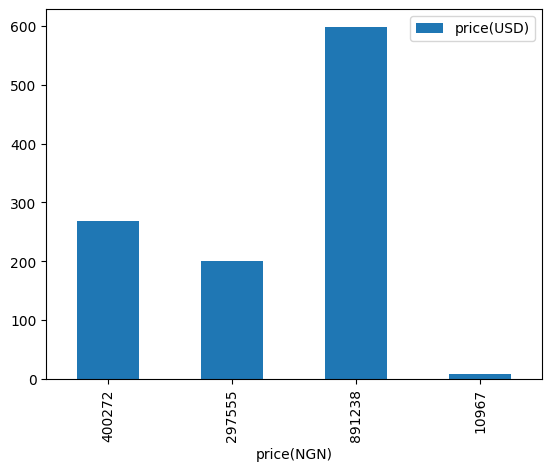

In [121]:
df.plot.bar(x='price(NGN)', y='price(USD)')

In [122]:
averange_usd = df['price(USD)'].mean()
average_ngn = df['price(NGN)'].mean()

print(f"The average price in USD is ${averange_usd.round(1)}")
print(f'The average price in naira #{average_ngn.round(1)}')

The average price in USD is $268.8
The average price in naira #400008.0


<Axes: xlabel='rating'>

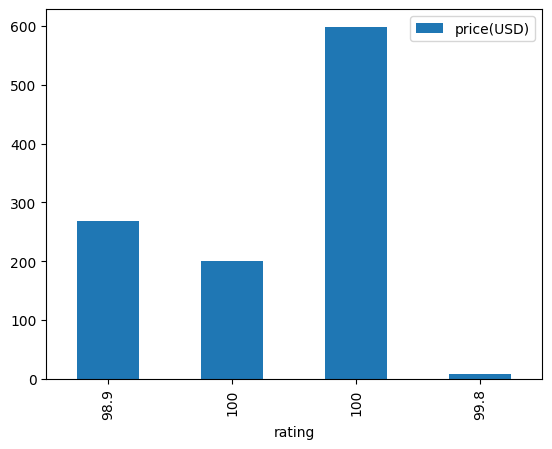

In [123]:
df.plot.bar(x='rating', y='price(USD)')

In [124]:
df['rating'].describe()

count       4
unique      3
top       100
freq        2
Name: rating, dtype: object

<Axes: xlabel='rating'>

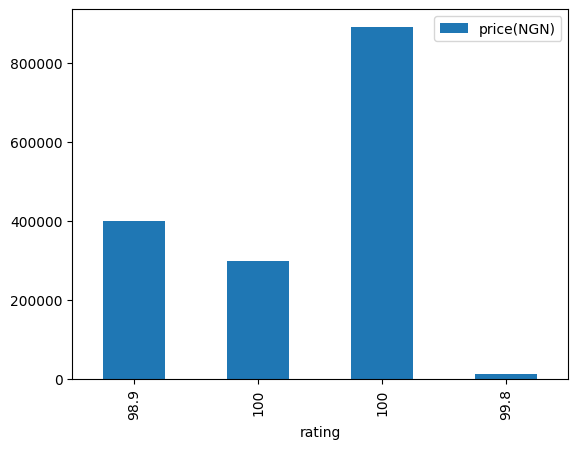

In [125]:
df.plot.bar(x='rating', y='price(NGN)')

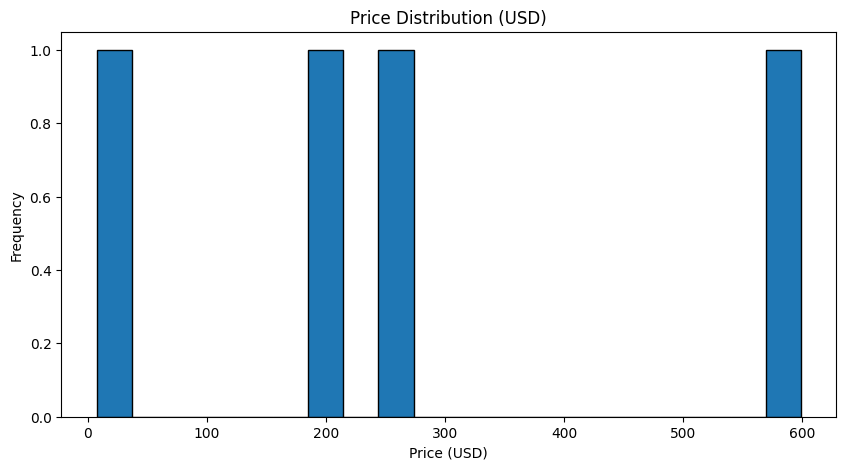

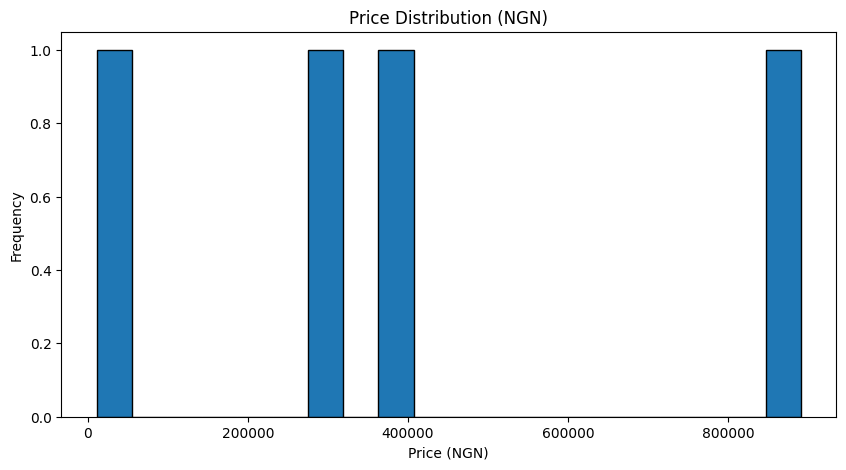

In [126]:
plt.figure(figsize=(10, 5))
df['price(USD)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()



In [ ]:
plt.figure(figsize=(10, 5))
df['price(NGN)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (NGN)')
plt.xlabel('Price (NGN)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

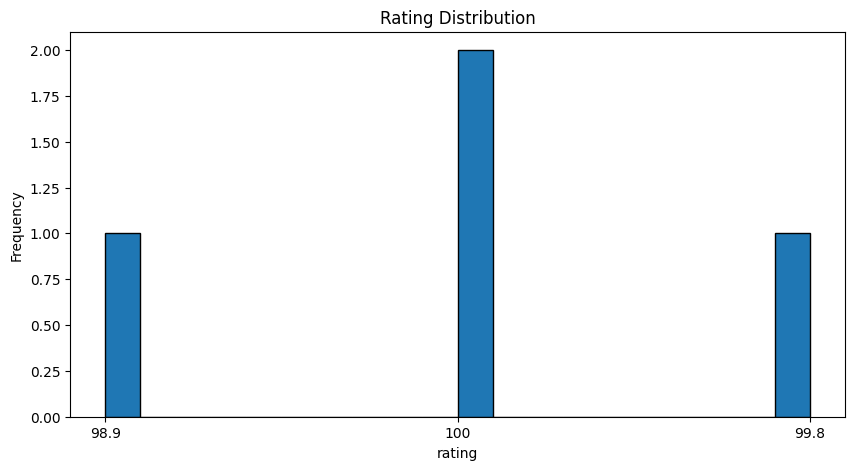

In [131]:
plt.figure(figsize=(10, 5))
df['rating'].hist(bins=20, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()